## Random forest

## Company Data
### A Cloth Manufacturing company is interested to know about the segment or attributes causes high sale. 
### Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis. 

## 1. Import Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## 2. Importing Data

In [2]:
company_data=pd.read_csv('Company_Data.csv')
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


## 3. Data Understanding

### 3.1 Initial Analysis

In [3]:
company_data.shape

(400, 11)

In [4]:
company_data.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [5]:
company_data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [6]:
company_data.describe(include='all')

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400,400.000000,400.000000,400,400
unique,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,Medium,NaN,NaN,Yes,Yes
freq,NaN,NaN,NaN,NaN,NaN,NaN,219,NaN,NaN,282,258
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,NaN,53.322500,13.900000,NaN,NaN
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,NaN,16.200297,2.620528,NaN,NaN
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,NaN,25.000000,10.000000,NaN,NaN
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,NaN,39.750000,12.000000,NaN,NaN
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,NaN,54.500000,14.000000,NaN,NaN
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,NaN,66.000000,16.000000,NaN,NaN


### 3.2 Data Visualization

#### Checking Normality and outlers

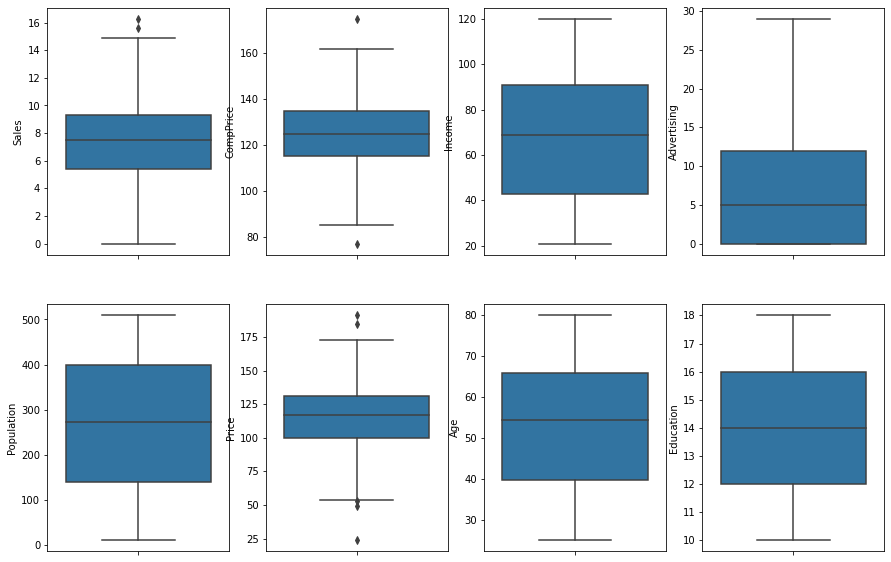

In [7]:
plt.figure(figsize=(15,10))
plt.subplot(2,4,1)
sns.boxplot(y='Sales',data=company_data)
plt.subplot(2,4,2)
sns.boxplot(y='CompPrice',data=company_data)
plt.subplot(2,4,3)
sns.boxplot(y='Income',data=company_data)
plt.subplot(2,4,4)
sns.boxplot(y='Advertising',data=company_data)
plt.subplot(2,4,5)
sns.boxplot(y='Population',data=company_data)
plt.subplot(2,4,6)
sns.boxplot(y='Price',data=company_data)
plt.subplot(2,4,7)
sns.boxplot(y='Age',data=company_data)
plt.subplot(2,4,8)
sns.boxplot(y='Education',data=company_data)
plt.show()

#### Plot for Categorical values

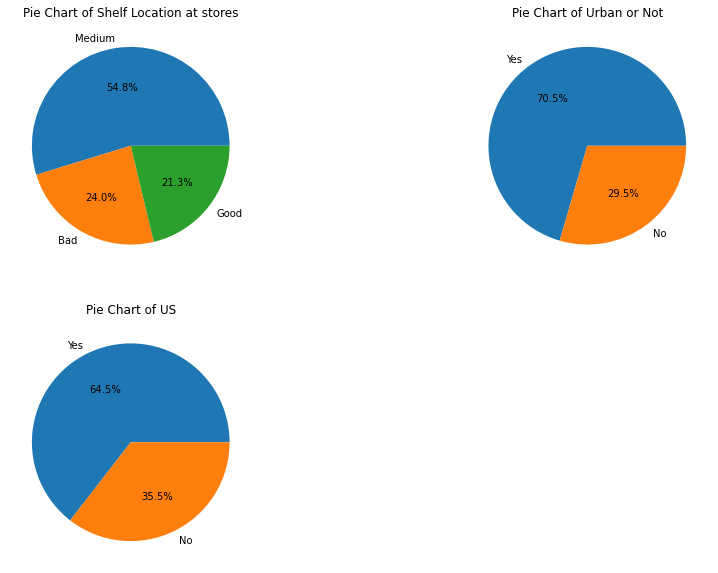

In [8]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.pie(x=company_data['ShelveLoc'].value_counts(), labels=['Medium','Bad', 'Good'], autopct='%2.1f%%')
plt.title('Pie Chart of Shelf Location at stores')
plt.subplot(2,2,2)
plt.pie(x=company_data['Urban'].value_counts(), labels=['Yes','No'], autopct='%2.1f%%')
plt.title('Pie Chart of Urban or Not')
plt.subplot(2,2,3)
plt.pie(x=company_data['US'].value_counts(), labels=['Yes','No'], autopct='%2.1f%%')
plt.title('Pie Chart of US')
plt.show()

#### Converting Target Values: Sales into Categorical Values : High and Low

In [9]:
company_data['Sales']=pd.cut(x=company_data['Sales'], bins=[0,8.6,16.3], labels=['Low','High'], right=False)
company_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,High,138,73,11,276,120,Bad,42,17,Yes,Yes
1,High,111,48,16,260,83,Good,65,10,Yes,Yes
2,High,113,35,10,269,80,Medium,59,12,Yes,Yes
3,Low,117,100,4,466,97,Medium,55,14,Yes,Yes
4,Low,141,64,3,340,128,Bad,38,13,Yes,No


In [10]:
company_data['Sales'].value_counts()

Low     261
High    139
Name: Sales, dtype: int64

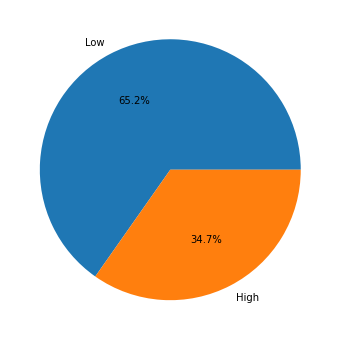

In [11]:
plt.figure(figsize=(8,6))
plt.pie(x=company_data['Sales'].value_counts(), labels=['Low','High'], autopct='%2.1f%%')
plt.show()

## 4. Data Preparation

In [12]:
le=LabelEncoder()
company_data[['Sales','ShelveLoc','Urban','US']]=company_data[['Sales','ShelveLoc','Urban','US']].apply(le.fit_transform)
company_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0,138,73,11,276,120,0,42,17,1,1
1,0,111,48,16,260,83,1,65,10,1,1
2,0,113,35,10,269,80,2,59,12,1,1
3,1,117,100,4,466,97,2,55,14,1,1
4,1,141,64,3,340,128,0,38,13,1,0


## 5. Model Building 

In [13]:
X=company_data.drop(labels='Sales', axis=1)
y=company_data[['Sales']]

In [14]:
X.shape, y.shape

((400, 10), (400, 1))

In [15]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=10, shuffle=True, stratify=y)

In [16]:
X_train.shape, y_train.shape

((320, 10), (320, 1))

In [17]:
X_test.shape, y_test.shape

((80, 10), (80, 1))

## 6. Model Training

In [18]:
rf_classifier=RandomForestClassifier()
rf_classifier.fit(X_train,y_train)

RandomForestClassifier()

## 7. Model testing || 8. Model Evaluation 

### For training data

In [19]:
y_pred_train=rf_classifier.predict(X_train)

In [20]:
print('Accuracy Score        :', accuracy_score(y_train, y_pred_train))
print('Classification Report :\n', classification_report(y_train, y_pred_train))
print('Confusion Matrix      :\n', confusion_matrix(y_train, y_pred_train))

Accuracy Score        : 1.0
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       111
           1       1.00      1.00      1.00       209

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320

Confusion Matrix      :
 [[111   0]
 [  0 209]]


### For testing data

In [21]:
y_pred_test=rf_classifier.predict(X_test)

In [22]:
print('Accuracy Score        :', accuracy_score(y_test, y_pred_test))
print('Classification Report :\n', classification_report(y_test, y_pred_test))
print('Confusion Matrix      :\n', confusion_matrix(y_test, y_pred_test))

Accuracy Score        : 0.8625
Classification Report :
               precision    recall  f1-score   support

           0       0.87      0.71      0.78        28
           1       0.86      0.94      0.90        52

    accuracy                           0.86        80
   macro avg       0.86      0.83      0.84        80
weighted avg       0.86      0.86      0.86        80

Confusion Matrix      :
 [[20  8]
 [ 3 49]]


#### Random Forest is working pretty well for our data but facing overfit problem

##### Let's do pruning

In [23]:
rf_classifier=RandomForestClassifier(criterion='entropy', max_depth=3)
rf_classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=3)

## 7. Model testing || 8. Model Evaluation 

### For training data

In [24]:
y_pred_train=rf_classifier.predict(X_train)

In [25]:
print('Accuracy Score        :', accuracy_score(y_train, y_pred_train))
print('Classification Report :\n', classification_report(y_train, y_pred_train))
print('Confusion Matrix      :\n', confusion_matrix(y_train, y_pred_train))

Accuracy Score        : 0.85
Classification Report :
               precision    recall  f1-score   support

           0       0.96      0.59      0.73       111
           1       0.82      0.99      0.90       209

    accuracy                           0.85       320
   macro avg       0.89      0.79      0.81       320
weighted avg       0.87      0.85      0.84       320

Confusion Matrix      :
 [[ 66  45]
 [  3 206]]


### For testing data

In [26]:
y_pred_test=rf_classifier.predict(X_test)

In [27]:
print('Accuracy Score        :', accuracy_score(y_test, y_pred_test))
print('Classification Report :\n', classification_report(y_test, y_pred_test))
print('Confusion Matrix      :\n', confusion_matrix(y_test, y_pred_test))

Accuracy Score        : 0.8125
Classification Report :
               precision    recall  f1-score   support

           0       0.88      0.54      0.67        28
           1       0.79      0.96      0.87        52

    accuracy                           0.81        80
   macro avg       0.84      0.75      0.77        80
weighted avg       0.82      0.81      0.80        80

Confusion Matrix      :
 [[15 13]
 [ 2 50]]


#### We have sort the overfitting problem